In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import numpy as np

In [20]:
directory = "D:/ИТМО/Python/vosaline_votemper/data"  

def to_correct_time(df):
    tot_rows = df.shape[0]
    for date_cell in range(1,tot_rows): 
        date_str = df.iloc[date_cell,1]
        date_format = '%d.%m.%Y %H:%M'
        date_obj = datetime.strptime(date_str, date_format)
        df.iloc[date_cell,1] = date_obj

def plots(x, y, param, name, model, multiple):
    if multiple == True:
        plt.plot(x, y, color = np.random.rand(3,), label=name, marker = 'o')             
        plt.xlabel((f'{param}_(NEMO)'), fontsize=12)   
        plt.ylabel("Depth", fontsize=12)                                        
        plt.title(f'{model}', fontsize=14)  
        plt.grid()
        plt.legend() 
        if param == 'vosaline':
            plt.savefig(f"D:/ИТМО/Python/vosaline_votemper/graphs/vosaline/{model}_{param}1111.png")
        else:
            plt.savefig(f"D:/ИТМО/Python/vosaline_votemper/graphs/votemper/{model}_{param}.png")
        #plt.show()
        #plt.close()
    else:
        plt.plot(x, y, color = np.random.rand(3,), marker = 'o')             
        plt.xlabel((f'{param}_(NEMO)'), fontsize=12)   
        plt.ylabel("Depth", fontsize=12)                                        
        plt.title(f'{name}', fontsize=14)    
        plt.grid()
        if param == 'vosaline':
            plt.savefig(f"D:/ИТМО/Python/vosaline_votemper/graphs/vosaline/{name}_{param}.png") 
        else: 
            plt.savefig(f"D:/ИТМО/Python/vosaline_votemper/graphs/votemper/{name}_{param}.png")
        #plt.show()
        #plt.close()

### Графики по каждой ПАБС, сгруппированные по пространству

In [23]:
def plotting(param, model, multiple): 
    for filename in os.listdir(directory):
        if 'csv' in filename:
            if model in filename:
                path = f'{directory}/{filename}'
                data = pd.read_csv(path, sep=';', decimal='.', encoding='latin-1')
                df = pd.DataFrame(data)
                name = path.split('/')[-1][:-4]
                
                to_correct_time(df)

                # Mean for winter 
                df['time'] = pd.to_datetime(df['time'], errors='coerce')
                only_winter = df.loc[(df['time'].dt.month.isin([1,2,12]))] #%Y-%m-%d %H:%M:%S
                avg_winter = only_winter.mean(axis=0)

                # DataFrame for winter values 
                new = pd.DataFrame(avg_winter)
                new['Index'] = new.index
                new.reset_index(drop=True, inplace=True)
                new.rename(columns={0: 'AvgWinter'}, inplace = True)
                new["Param"] = new['Index'].str.split('-').str[0]
                new["Depth"] = new['Index'].str.split('-').str[1].astype(float).round(2)
                new_cols = ["Index","Param","Depth","AvgWinter"]
                new = new[new_cols]

                # Plot for params 
                x = new['AvgWinter'].loc[new['Param'] == param]
                y = new['Depth'].loc[new['Param'] == param] 
                
                plots(x, y, param, name, model, multiple)
    plt.show()
    plt.close()

# Выбрать параметр для выгрузки
param = 'vosaline'    # 'votemper' or 'vosaline'

# Поочереди раскомментить нужное 
plotting(param, 'mod01', True, directory)    
"""plotting(param, 'mod02', True)
plotting(param, 'mod05', True)
plotting(param, 'mod06_1', False)
plotting(param, 'mod10__', True)
plotting(param, 'mod10_1', False)
plotting(param, 'mod11', False)
plotting(param, 'mod12', True)
plotting(param, 'mod13', False)
plotting(param, 'mod17', True)
plotting(param, 'mod18', True)"""

"plotting(param, 'mod02', True)\nplotting(param, 'mod05', True)\nplotting(param, 'mod06_1', False)\nplotting(param, 'mod10__', True)\nplotting(param, 'mod10_1', False)\nplotting(param, 'mod11', False)\nplotting(param, 'mod12', True)\nplotting(param, 'mod13', False)\nplotting(param, 'mod17', True)\nplotting(param, 'mod18', True)"

### Осредненные данные по каждой ПАБС без сдвига по пространству 

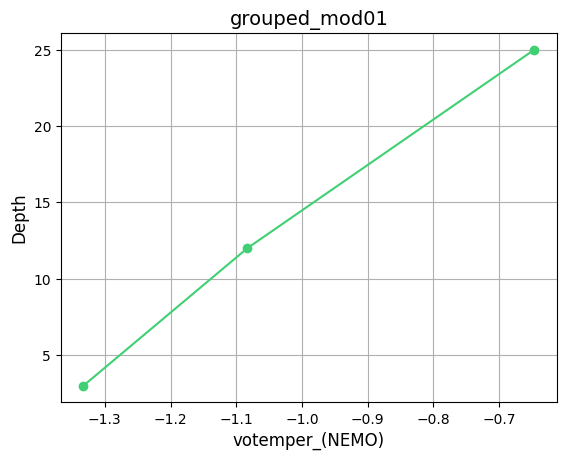

In [46]:
directory_grouped = "D:/ИТМО/Python/vosaline_votemper/data/grouped"  

def grouped_plotting(param, model, multiple): 
    for filename in os.listdir(directory_grouped):
        if 'csv' in filename:
            if model in filename:
                path = f'{directory_grouped}/{filename}'
                data = pd.read_csv(path, sep=',', decimal='.', encoding='latin-1', index_col=0)
                df = pd.DataFrame(data)
                name = path.split('/')[-1][:-4]
                
                # Plot for params 
                x = df['AvgWinter'].loc[df['Param'] == param]
                y = df['Depth'].loc[df['Param'] == param] 
                
                plots(x, y, param, name, model, multiple)


# Выбрать параметр для выгрузки
param = 'votemper'    # 'votemper' or 'vosaline'

# Поменять название ниже на 01, 02, 05, 10__, 12
grouped_plotting(param, 'grouped_mod01', False)        